In [1]:
#Importamos todos los paquetes que vamos a necesitar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

In [146]:
# cargamos nuestro dataset
modelo = pd.read_csv('fourth_banks.csv',sep=',')

In [148]:
modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   banco   352 non-null    object 
 1   mes     352 non-null    object 
 2   year    352 non-null    int64  
 3   roa     352 non-null    float64
 4   size    352 non-null    float64
 5   cap     352 non-null    float64
 6   loan    352 non-null    float64
 7   dep     352 non-null    float64
 8   prov    352 non-null    float64
 9   pbi     352 non-null    float64
 10  tc      352 non-null    float64
 11  i       352 non-null    float64
 12  ftamn   88 non-null     float64
 13  tpmn    89 non-null     float64
dtypes: float64(11), int64(1), object(2)
memory usage: 38.6+ KB


<AxesSubplot:xlabel='banco', ylabel='roa'>

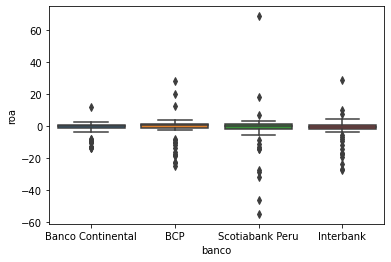

In [116]:
sns.boxplot(x="banco", y="roa", data=modelo)

In [10]:
modelo.describe()

,year,roa,size,cap,loan,dep,prov,pbi,tc,i,ftamn,tpmn
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,88.000000,89.000000
mean,2017.181818,-1.723817,0.880385,0.266150,-0.527923,-0.016665,0.835509,1.814633,2.932715,-2.020575,0.283342,-1.022014
std,2.127264,8.421587,4.227555,2.982073,1.720335,2.105546,6.662171,9.454676,4.198234,10.028248,9.643813,3.176272
min,2014.000000,-54.903009,-23.122637,-7.258065,-8.293690,-7.545599,-40.414935,-39.090000,-7.479939,-80.000000,-41.433531,-14.325891
25%,2015.000000,-1.644432,-0.928285,-1.312102,-1.139243,-1.364148,-0.896792,1.269063,0.582736,0.000000,-2.545743,-2.140249
50%,2017.000000,-0.183885,0.676212,-0.321762,-0.195365,0.146933,0.625673,2.716562,2.604710,0.000000,0.304262,-0.710356
75%,2019.000000,0.900231,2.353641,0.910022,0.271767,1.240893,2.083732,3.853096,6.232968,0.000000,2.859619,0.579690
max,2021.000000,68.501491,28.246575,23.781388,8.577214,6.861428,56.532370,58.490344,10.829448,7.692308,56.626096,4.840855


In [ ]:
#1) Cual ha sido el comportamiento del ROA de cada banco con respecto a V. Macroeconómicas
#pbi,tc,i
#comparación 2016 con 2021, analisis covid, primeros años de gobierno 20 
#2) Analisis de los 5 indicadores de los bancos
#EDA
#grafico de barras, boxplot, scatterplot
#3) Analisis descriptivo del efecto de los factores internos en la rentabilidad de las empresas bancarias
#4) Predicción del ROA

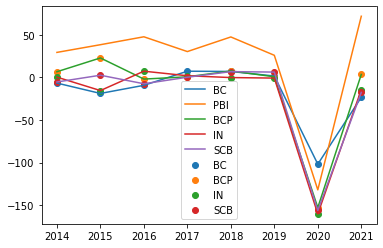

In [73]:
#Evaluación del Roa 
modelo_roa = modelo.groupby(['year', 'banco']).sum().reset_index()

# calculando datasets por banco
modelo_continental = modelo_roa[modelo_roa['banco'] == 'Banco Continental']
modelo_bcp = modelo_roa[modelo_roa['banco'] == 'BCP']
modelo_interbank = modelo_roa[modelo_roa['banco'] == 'Scotiabank Peru']
modelo_scotiabank = modelo_roa[modelo_roa['banco'] == 'Interbank']

# haciendo la grafica
plt.scatter(modelo_continental['year'], modelo_continental['roa'], label='BC')
plt.scatter(modelo_bcp['year'], modelo_bcp['roa'], label='BCP')
plt.scatter(modelo_interbank['year'], modelo_interbank['roa'], label='IN')
plt.scatter(modelo_scotiabank['year'], modelo_scotiabank['roa'], label='SCB')
plt.plot(modelo_continental['year'], modelo_continental['roa'], label='BC')
plt.plot(modelo_continental['year'], modelo_continental['pbi'], label='PBI')
plt.plot(modelo_bcp['year'], modelo_bcp['roa'], label='BCP')
plt.plot(modelo_interbank['year'], modelo_interbank['roa'], label='IN')
plt.plot(modelo_scotiabank['year'], modelo_scotiabank['roa'], label='SCB')
plt.legend()
plt.show()

<AxesSubplot:ylabel='i'>

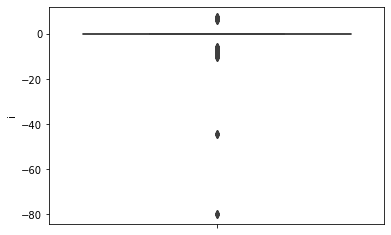

In [18]:
# ahora hacemos un boxplot de la variable success
sns.boxplot(y = 'i', data = modelo)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='i', ylabel='Density'>

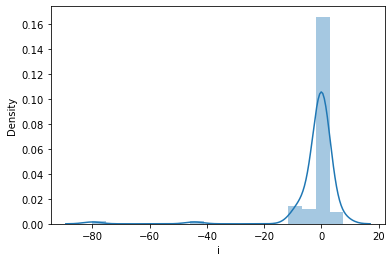

In [19]:
#seguimos con un histograma
sns.distplot(modelo['i'])

<AxesSubplot:>

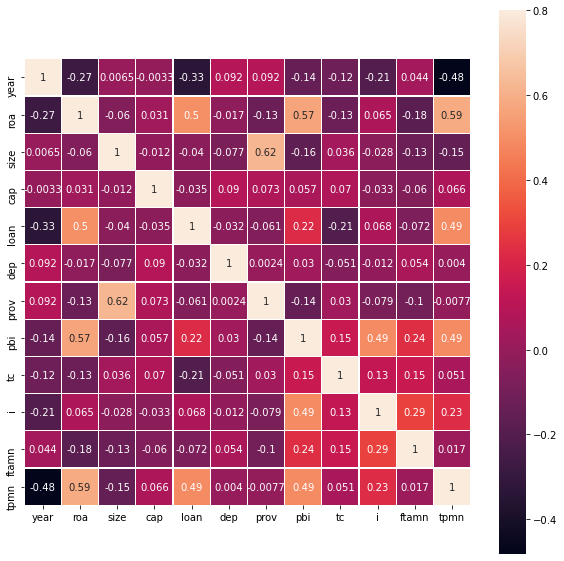

In [20]:
# si queremos mirar todas las correlaciones
corr = modelo.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True)

In [ ]:
#filtrando para bcp

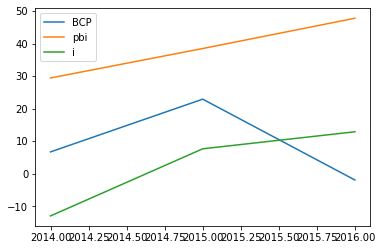

In [76]:
modelo_2016_bcp = modelo[(modelo['year']<2017) & (modelo['banco']=='BCP')]
modelo_roa_bcp_2016 = modelo_2016_bcp.groupby(['year', 'banco']).sum().reset_index()

modelo_bcp2 = modelo_roa_bcp_2016[modelo_roa_bcp_2016['banco'] == 'BCP']


plt.plot(modelo_bcp2['year'], modelo_bcp2['roa'], label='BCP')
plt.plot(modelo_bcp2['year'], modelo_bcp2['pbi'], label='pbi')
plt.plot(modelo_bcp2['year'], modelo_bcp2['i'], label='i')

plt.legend()
plt.show()

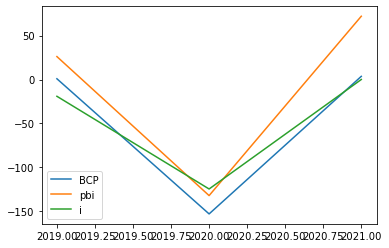

In [77]:
modelo_2019_bcp = modelo[(modelo['year']>2018) & (modelo['banco']=='BCP')]
modelo_roa_bcp_2019 = modelo_2019_bcp.groupby(['year', 'banco']).sum().reset_index()

modelo_bcp3 = modelo_roa_bcp_2019[modelo_roa_bcp_2019['banco'] == 'BCP']


plt.plot(modelo_bcp3['year'], modelo_bcp3['roa'], label='BCP')
plt.plot(modelo_bcp3['year'], modelo_bcp3['pbi'], label='pbi')
plt.plot(modelo_bcp3['year'], modelo_bcp3['i'], label='i')

plt.legend()
plt.show()


<AxesSubplot:>

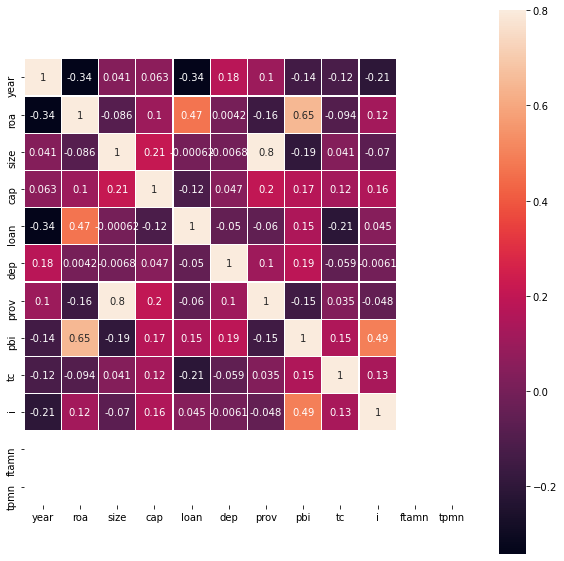

In [168]:
modelo__bcp = modelo[(modelo['banco']=='BCP')]
corr = modelo__bcp.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True)

<AxesSubplot:xlabel='loan', ylabel='roa'>

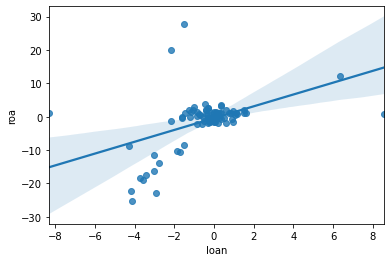

In [122]:
sns.regplot(x='loan', y="roa", data=modelo__bcp)

<AxesSubplot:xlabel='pbi', ylabel='roa'>

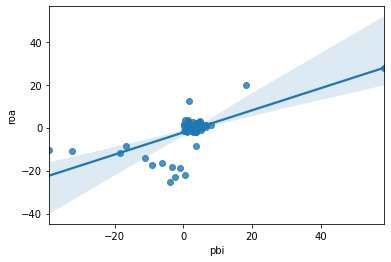

In [123]:
sns.regplot(x='pbi', y="roa", data=modelo__bcp)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan', ylabel='Density'>

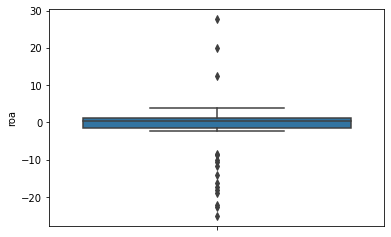

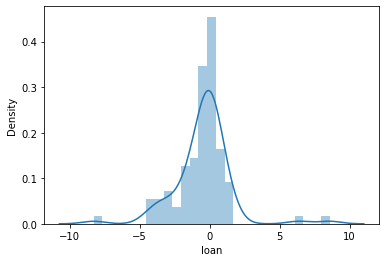

In [134]:
sns.boxplot(y = 'roa', data = modelo__bcp)
plt.figure()
sns.distplot(modelo__bcp['loan'])

In [101]:
print('minimo roa 2016: ', modelo_2016_bcp['roa'].min())
print('minimo valor PBI 2016:', modelo_2016_bcp['pbi'].min())
print('minimo valor i 2016:', modelo_2016_bcp['i'].min())
print('minimo roa 2019: ', modelo_2019_bcp['roa'].min())
print('minimo valor PBI 2019:', modelo_2019_bcp['pbi'].min())
print('minimo valor i 2019:', modelo_2019_bcp['i'].min())


minimo roa 2016:  -8.65143130243628
minimo valor PBI 2016: 0.157154628621769
minimo valor i 2016: -7.14285714285714
minimo roa 2019:  -25.2244435606913
minimo valor PBI 2019: -39.09
minimo valor i 2019: -80.0


In [102]:
print('maximo roa 2016: ', modelo_2016_bcp['roa'].max())
print('maximo valor PBI 2016:', modelo_2016_bcp['pbi'].max())
print('maximo valor i 2016:', modelo_2016_bcp['i'].max())
print('maximo roa 2019: ', modelo_2019_bcp['roa'].max())
print('maximo valor PBI 2019:', modelo_2019_bcp['pbi'].max())
print('maximo valor i 2019:', modelo_2019_bcp['i'].max())

maximo roa 2016:  12.3172357789356
maximo valor PBI 2016: 6.51171232918273
maximo valor i 2016: 7.69230769230769
maximo roa 2019:  27.792864645669
maximo valor PBI 2019: 58.4903436908341
maximo valor i 2019: 0.0


In [103]:
print('promedio roa 2016: ', modelo_2016_bcp['roa'].mean())
print('promedio valor PBI 2016:', modelo_2016_bcp['pbi'].mean())
print('promedio valor i 2016:', modelo_2016_bcp['i'].mean())
print('promedio roa 2019: ', modelo_2019_bcp['roa'].mean())
print('promedio valor PBI 2019:', modelo_2019_bcp['pbi'].mean())
print('promedio valor i 2019:', modelo_2019_bcp['i'].mean())

promedio roa 2016:  0.7717427542680829
promedio valor PBI 2016: 3.2138169465022135
promedio valor i 2016: 0.21367521367521358
promedio roa 2019:  -5.299157370368836
promedio valor PBI 2019: -1.214496574749953
promedio valor i 2019: -5.1262626262626245


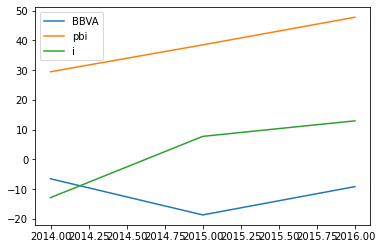

In [84]:
#Analisis del BBVA
modelo_2016_bbva = modelo[(modelo['year']<2017) & (modelo['banco']=='Banco Continental')]
modelo_roa_bbva_2016 = modelo_2016_bbva.groupby(['year', 'banco']).sum().reset_index()

modelo_bbva2 = modelo_roa_bbva_2016[modelo_roa_bbva_2016['banco'] == 'Banco Continental']

plt.plot(modelo_bbva2['year'], modelo_bbva2['roa'], label='BBVA')
plt.plot(modelo_bbva2['year'], modelo_bbva2['pbi'], label='pbi')
plt.plot(modelo_bbva2['year'], modelo_bbva2['i'], label='i')

plt.legend()
plt.show()

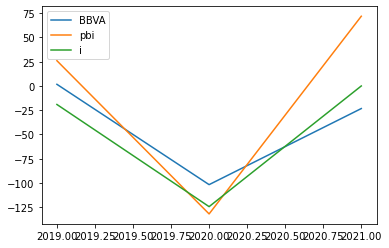

In [81]:
modelo_2019_bbva = modelo[(modelo['year']>2018) & (modelo['banco']=='Banco Continental')]
modelo_roa_bbva_2019 = modelo_2019_bbva.groupby(['year', 'banco']).sum().reset_index()

modelo_bbva3 = modelo_roa_bbva_2019[modelo_roa_bbva_2019['banco'] == 'Banco Continental']


plt.plot(modelo_bbva3['year'], modelo_bbva3['roa'], label='BBVA')
plt.plot(modelo_bbva3['year'], modelo_bbva3['pbi'], label='pbi')
plt.plot(modelo_bbva3['year'], modelo_bbva3['i'], label='i')

plt.legend()
plt.show()

In [104]:
print('minimo roa 2016: ', modelo_2016_bbva['roa'].min())
print('minimo valor PBI 2016:', modelo_2016_bbva['pbi'].min())
print('minimo valor i 2016:', modelo_2016_bbva['i'].min())
print('minimo roa 2019: ', modelo_2019_bbva['roa'].min())
print('minimo valor PBI 2019:', modelo_2019_bbva['pbi'].min())
print('minimo valor i 2019:', modelo_2019_bbva['i'].min())

minimo roa 2016:  -3.47745465957839
minimo valor PBI 2016: 0.157154628621769
minimo valor i 2016: -7.14285714285714
minimo roa 2019:  -13.8898907127353
minimo valor PBI 2019: -39.09
minimo valor i 2019: -80.0


In [105]:
print('maximo roa 2016: ', modelo_2016_bbva['roa'].max())
print('maximo valor PBI 2016:', modelo_2016_bbva['pbi'].max())
print('maximo valor i 2016:', modelo_2016_bbva['i'].max())
print('maximo roa 2019: ', modelo_2019_bbva['roa'].max())
print('maximo valor PBI 2019:', modelo_2019_bbva['pbi'].max())
print('maximo valor i 2019:', modelo_2019_bbva['i'].max())

maximo roa 2016:  1.55186022625234
maximo valor PBI 2016: 6.51171232918273
maximo valor i 2016: 7.69230769230769
maximo roa 2019:  11.6426661004906
maximo valor PBI 2019: 58.4903436908341
maximo valor i 2019: 0.0


In [106]:
print('promedio roa 2016: ', modelo_2016_bbva['roa'].mean())
print('promedio valor PBI 2016:', modelo_2016_bbva['pbi'].mean())
print('promedio valor i 2016:', modelo_2016_bbva['i'].mean())
print('promedio roa 2019: ', modelo_2019_bbva['roa'].mean())
print('promedio valor PBI 2019:', modelo_2019_bbva['pbi'].mean())
print('promedio valor i 2019:', modelo_2019_bbva['i'].mean())

promedio roa 2016:  -0.959327151552475
promedio valor PBI 2016: 3.2138169465022135
promedio valor i 2016: 0.21367521367521358
promedio roa 2019:  -4.405234735991798
promedio valor PBI 2019: -1.214496574749953
promedio valor i 2019: -5.1262626262626245


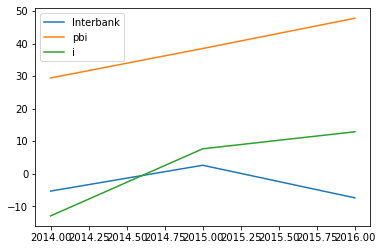

In [85]:
#Analisis del Banco Interbank
modelo_2016_interbank = modelo[(modelo['year']<2017) & (modelo['banco']=='Interbank')]
modelo_roa_interbank_2016 = modelo_2016_interbank.groupby(['year', 'banco']).sum().reset_index()

modelo_interbank2 = modelo_roa_interbank_2016[modelo_roa_interbank_2016['banco'] == 'Interbank']


plt.plot(modelo_interbank2['year'], modelo_interbank2['roa'], label='Interbank')
plt.plot(modelo_interbank2['year'], modelo_interbank2['pbi'], label='pbi')
plt.plot(modelo_interbank2['year'], modelo_interbank2['i'], label='i')

plt.legend()
plt.show()

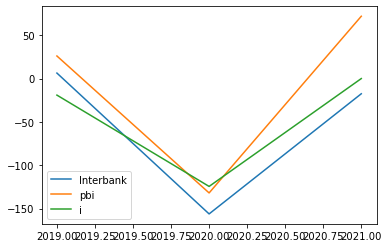

In [87]:
#Analisis del Banco Interbank
modelo_2019_interbank = modelo[(modelo['year']>2018) & (modelo['banco']=='Interbank')]
modelo_roa_interbank_2019 = modelo_2019_interbank.groupby(['year', 'banco']).sum().reset_index()

modelo_interbank3 = modelo_roa_interbank_2019[modelo_roa_interbank_2019['banco'] == 'Interbank']


plt.plot(modelo_interbank3['year'], modelo_interbank3['roa'], label='Interbank')
plt.plot(modelo_interbank3['year'], modelo_interbank3['pbi'], label='pbi')
plt.plot(modelo_interbank3['year'], modelo_interbank3['i'], label='i')

plt.legend()
plt.show()

In [107]:
print('minimo roa 2016: ', modelo_2016_interbank['roa'].min())
print('minimo valor PBI 2016:', modelo_2016_interbank['pbi'].min())
print('minimo valor i 2016:', modelo_2016_interbank['i'].min())
print('minimo roa 2019: ', modelo_2019_interbank['roa'].min())
print('minimo valor PBI 2019:', modelo_2019_interbank['pbi'].min())
print('minimo valor i 2019:', modelo_2019_interbank['i'].min())

minimo roa 2016:  -3.4777513088847
minimo valor PBI 2016: 0.157154628621769
minimo valor i 2016: -7.14285714285714
minimo roa 2019:  -27.6480542172077
minimo valor PBI 2019: -39.09
minimo valor i 2019: -80.0


In [108]:
print('maximo roa 2016: ', modelo_2016_interbank['roa'].max())
print('maximo valor PBI 2016:', modelo_2016_interbank['pbi'].max())
print('maximo valor i 2016:', modelo_2016_interbank['i'].max())
print('maximo roa 2019: ', modelo_2019_interbank['roa'].max())
print('maximo valor PBI 2019:', modelo_2019_interbank['pbi'].max())
print('maximo valor i 2019:', modelo_2019_interbank['i'].max())

maximo roa 2016:  4.21968356968442
maximo valor PBI 2016: 6.51171232918273
maximo valor i 2016: 7.69230769230769
maximo roa 2019:  28.4831407675436
maximo valor PBI 2019: 58.4903436908341
maximo valor i 2019: 0.0


In [109]:
print('promedio roa 2016: ', modelo_2016_interbank['roa'].mean())
print('promedio valor PBI 2016:', modelo_2016_interbank['pbi'].mean())
print('promedio valor i 2016:', modelo_2016_interbank['i'].mean())
print('promedio roa 2019: ', modelo_2019_interbank['roa'].mean())
print('promedio valor PBI 2019:', modelo_2019_interbank['pbi'].mean())
print('promedio valor i 2019:', modelo_2019_interbank['i'].mean())

promedio roa 2016:  -0.2785936079031433
promedio valor PBI 2016: 3.2138169465022135
promedio valor i 2016: 0.21367521367521358
promedio roa 2019:  -5.977566135141872
promedio valor PBI 2019: -1.214496574749953
promedio valor i 2019: -5.1262626262626245


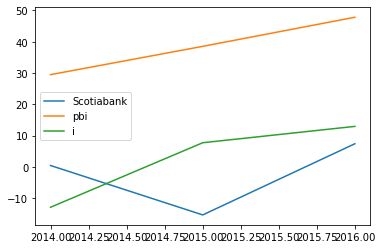

In [88]:
#Analisis del Banco Scotiabank
modelo_2016_scotiabank = modelo[(modelo['year']<2017) & (modelo['banco']=='Scotiabank Peru')]
modelo_roa_scotiabank_2016 = modelo_2016_scotiabank.groupby(['year', 'banco']).sum().reset_index()

modelo_scotiabank2 = modelo_roa_scotiabank_2016[modelo_roa_scotiabank_2016['banco'] == 'Scotiabank Peru']


plt.plot(modelo_scotiabank2['year'], modelo_scotiabank2['roa'], label='Scotiabank')
plt.plot(modelo_scotiabank2['year'], modelo_scotiabank2['pbi'], label='pbi')
plt.plot(modelo_scotiabank2['year'], modelo_scotiabank2['i'], label='i')

plt.legend()
plt.show()

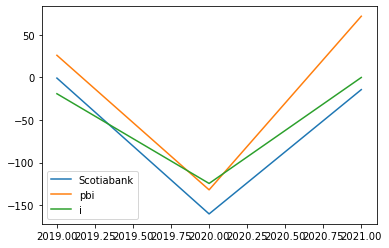

In [89]:
#Analisis del Banco Scotiabank
modelo_2019_scotiabank = modelo[(modelo['year']>2018) & (modelo['banco']=='Scotiabank Peru')]
modelo_roa_scotiabank_2019 = modelo_2019_scotiabank.groupby(['year', 'banco']).sum().reset_index()

modelo_scotiabank3 = modelo_roa_scotiabank_2019[modelo_roa_scotiabank_2019['banco'] == 'Scotiabank Peru']


plt.plot(modelo_scotiabank3['year'], modelo_scotiabank3['roa'], label='Scotiabank')
plt.plot(modelo_scotiabank3['year'], modelo_scotiabank3['pbi'], label='pbi')
plt.plot(modelo_scotiabank3['year'], modelo_scotiabank3['i'], label='i')

plt.legend()
plt.show()

In [110]:
print('minimo roa 2016: ', modelo_2016_scotiabank['roa'].min())
print('minimo valor PBI 2016:', modelo_2016_scotiabank['pbi'].min())
print('minimo valor i 2016:', modelo_2016_scotiabank['i'].min())
print('minimo roa 2019: ', modelo_2019_scotiabank['roa'].min())
print('minimo valor PBI 2019:', modelo_2019_scotiabank['pbi'].min())
print('minimo valor i 2019:', modelo_2019_scotiabank['i'].min())

minimo roa 2016:  -5.06579735642933
minimo valor PBI 2016: 0.157154628621769
minimo valor i 2016: -7.14285714285714
minimo roa 2019:  -54.9030087636569
minimo valor PBI 2019: -39.09
minimo valor i 2019: -80.0


In [111]:
print('maximo roa 2016: ', modelo_2016_scotiabank['roa'].max())
print('maximo valor PBI 2016:', modelo_2016_scotiabank['pbi'].max())
print('maximo valor i 2016:', modelo_2016_scotiabank['i'].max())
print('maximo roa 2019: ', modelo_2019_scotiabank['roa'].max())
print('maximo valor PBI 2019:', modelo_2019_scotiabank['pbi'].max())
print('maximo valor i 2019:', modelo_2019_scotiabank['i'].max())

maximo roa 2016:  6.78031167360085
maximo valor PBI 2016: 6.51171232918273
maximo valor i 2016: 7.69230769230769
maximo roa 2019:  68.5014908049697
maximo valor PBI 2019: 58.4903436908341
maximo valor i 2019: 0.0


In [112]:
print('promedio roa 2016: ', modelo_2016_scotiabank['roa'].mean())
print('promedio valor PBI 2016:', modelo_2016_scotiabank['pbi'].mean())
print('promedio valor i 2016:', modelo_2016_scotiabank['i'].mean())
print('promedio roa 2019: ', modelo_2019_scotiabank['roa'].mean())
print('promedio valor PBI 2019:', modelo_2019_scotiabank['pbi'].mean())
print('promedio valor i 2019:', modelo_2019_scotiabank['i'].mean())

promedio roa 2016:  -0.21036942032357342
promedio valor PBI 2016: 3.2138169465022135
promedio valor i 2016: 0.21367521367521358
promedio roa 2019:  -6.2577259630195865
promedio valor PBI 2019: -1.214496574749953
promedio valor i 2019: -5.1262626262626245


In [ ]:
#grafico de barras

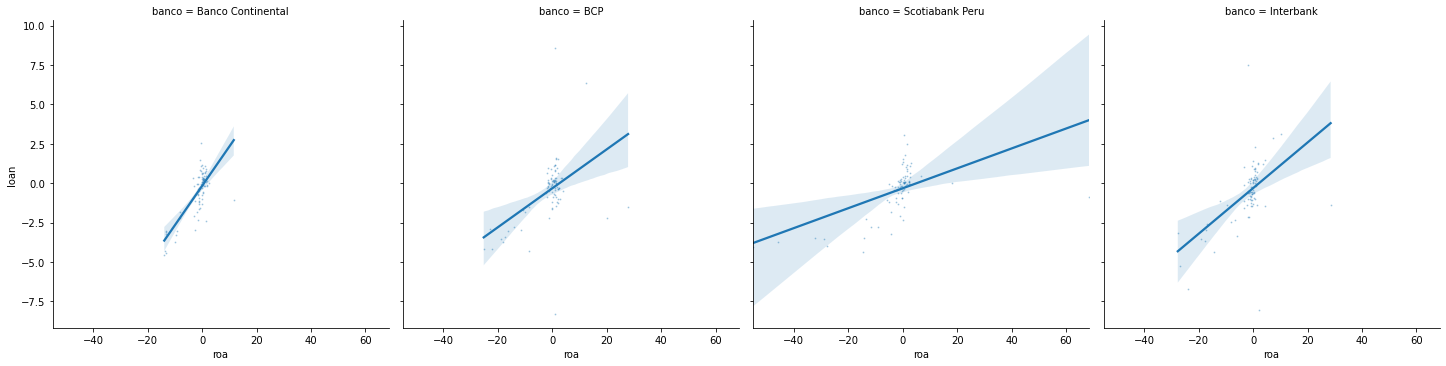

In [126]:
sns.lmplot(x='roa', y="loan", col = 'banco', data=modelo, truncate = True, scatter_kws={'s':0.8, 'alpha':0.3})

<AxesSubplot:ylabel='banco'>

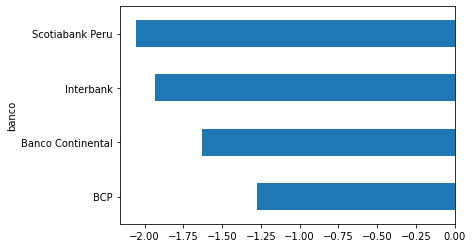

In [131]:
modelo.groupby(['banco']).mean()['roa'].plot.barh()

In [149]:
# cargamos las funciones necesarias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [152]:
columnas_interes = ['size','cap','loan','dep','prov','pbi']
columnas_interes2 = ['roa']
X = modelo__bcp[columnas_interes]
y = modelo__bcp[columnas_interes2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [169]:
# crear columnas condicionalmente
condiciones = [
    (modelo__bcp["roa"]<0),
    (modelo__bcp["roa"]>=0),
]
opciones = [0, 1]

# incluir condiciones y opciones
modelo__bcp["efect_roa"] = np.select(condiciones, opciones)
modelo__bcp

<ipython-input-169-0fb9bfb88efc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelo__bcp["efect_roa"] = np.select(condiciones, opciones)


,banco,mes,year,roa,size,cap,loan,dep,prov,pbi,tc,i,ftamn,tpmn,efect_roa
88,BCP,enero,2014,1.083969,0.565524,-0.275862,0.347605,-1.878980,2.839013,4.228164,8.482985,0.0,NaN,-3.264528,1
89,BCP,febrero,2014,-1.175223,2.122662,4.218534,-0.041819,1.103355,-2.640422,5.208232,6.313872,0.0,NaN,NaN,0
90,BCP,marzo,2014,0.496471,-0.755117,-0.995355,0.222459,1.371243,2.832730,5.412275,6.237023,0.0,NaN,NaN,1
91,BCP,abril,2014,-2.245367,0.635389,1.005362,-0.611983,-1.878618,-0.509897,2.923294,5.947579,0.0,NaN,NaN,0
92,BCP,mayo,2014,-1.493250,-0.616686,-0.265428,-0.196287,1.076572,1.637678,2.590533,3.938303,0.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,BCP,diciembre,2020,-22.232111,0.960698,-0.459318,-4.202507,1.137466,1.244132,0.580000,6.730900,0.0,NaN,NaN,0
172,BCP,enero,2021,-18.972122,1.049062,-1.582070,-3.575566,-0.165817,0.687454,-1.019978,7.578820,0.0,NaN,NaN,0
173,BCP,febrero,2021,-25.224444,2.358857,-0.133958,-4.149158,0.518076,2.094209,-3.780000,6.757768,0.0,NaN,NaN,0
174,BCP,marzo,2021,19.972663,-0.276522,0.067069,-2.183279,1.535937,1.180930,18.210004,6.231617,0.0,NaN,NaN,1
